In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Delete old data if you want
!rm -rf Emotion_data

In [ ]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown https://drive.google.com/uc?id=1ohBrroancKvxeyDAtnYzxAD1gLgCesDk&export=download

Downloading...
From: https://drive.google.com/uc?id=1ohBrroancKvxeyDAtnYzxAD1gLgCesDk
To: /content/augmented_balanced_emotion_data_pixta.zip
100% 2.76G/2.76G [00:22<00:00, 124MB/s]


In [ ]:
# Unzip dataset
!unzip -qq augmented_balanced_emotion_data_pixta.zip
!rm augmented_balanced_emotion_data_pixta.zip

In [ ]:
!gdown https://drive.google.com/uc?id=1Y2aekLu6ZDqIjpZEQv8MLS8clx_5wGnX&export=download

Downloading...
From: https://drive.google.com/uc?id=1Y2aekLu6ZDqIjpZEQv8MLS8clx_5wGnX
To: /content/emotion_data_pixta.zip
100% 573M/573M [00:02<00:00, 199MB/s]


In [ ]:
# Unzip dataset
!unzip -qq emotion_data_pixta.zip
!rm emotion_data_pixta.zip

In [ ]:
!pip install keras_cv
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 17.5 MB/s eta 0:00:00


In [ ]:
# Prompt:
# I have a "dataset" folder for image classification task that contains subfolders, each subfolder contains images belongs to a class (name of folder is name of the class), write Python code to randomly divide the dataset folder into "Train", "Test" and "Val"

import os
import shutil
import random

def split_dataset(dataset_path, save_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for cls in classes:
        cls_path = os.path.join(dataset_path, cls)
        images = [img for img in os.listdir(cls_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        random.shuffle(images)

        train_size = int(train_ratio * len(images))
        val_size = int(val_ratio * len(images))

        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        for img in train_images:
            target_save_path =  os.path.join(save_path, 'Train', cls)
            if not os.path.exists(target_save_path):
                os.makedirs(target_save_path)
            print(os.path.join(cls_path, img), "->", os.path.join(target_save_path, img))
            shutil.copy(os.path.join(cls_path, img), os.path.join(target_save_path, img))

        for img in val_images:
            target_save_path =  os.path.join(save_path, 'Val', cls)
            if not os.path.exists(target_save_path):
                os.makedirs(target_save_path)
            print(os.path.join(cls_path, img), "->", os.path.join(target_save_path, img))
            shutil.copy(os.path.join(cls_path, img), os.path.join(target_save_path, img))

        for img in test_images:
            target_save_path =  os.path.join(save_path, 'Test', cls)
            if not os.path.exists(target_save_path):
                os.makedirs(target_save_path)
            print(os.path.join(cls_path, img), "->", os.path.join(target_save_path, img))
            shutil.copy(os.path.join(cls_path, img), os.path.join(target_save_path, img))

# Example usage
dataset_path = 'augmented_balanced_emotion_data_pixta'  # Replace with your dataset path
save_path = 'emotion_data_samp_2'

split_dataset(dataset_path, save_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
augmented_balanced_emotion_data_pixta/Neutral/7624_74560849.jpg -> emotion_data_samp_2/Val/Neutral/7624_74560849.jpg
augmented_balanced_emotion_data_pixta/Neutral/6039_67687007.jpg -> emotion_data_samp_2/Val/Neutral/6039_67687007.jpg
augmented_balanced_emotion_data_pixta/Neutral/8201_70691895_copy9877.jpg -> emotion_data_samp_2/Val/Neutral/8201_70691895_copy9877.jpg
augmented_balanced_emotion_data_pixta/Neutral/435_12624874.jpg -> emotion_data_samp_2/Val/Neutral/435_12624874.jpg
augmented_balanced_emotion_data_pixta/Neutral/6752_66058359.jpg -> emotion_data_samp_2/Val/Neutral/6752_66058359.jpg
augmented_balanced_emotion_data_pixta/Neutral/10024_77704298_copy1391.jpg -> emotion_data_samp_2/Val/Neutral/10024_77704298_copy1391.jpg
augmented_balanced_emotion_data_pixta/Neutral/5476_64989320_copy6799.jpg -> emotion_data_samp_2/Val/Neutral/5476_64989320_copy6799.jpg
augmented_balanced_emotion_data_pixta/Neutral/1608_29907367.jpg -> emo

In [ ]:
# Delete old data if you want
!rm -rf /content/emotion_data_samp_2/Test

In [ ]:
# Delete old data if you want
!rm -rf /content/emotion_data_samp_2/Val

In [ ]:
# Prompt:
# I have a "dataset" folder for image classification task that contains subfolders, each subfolder contains images belongs to a class (name of folder is name of the class), write Python code to randomly divide the dataset folder into "Train", "Test" and "Val"

import os
import shutil
import random

def split_dataset(dataset_path, save_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for cls in classes:
        cls_path = os.path.join(dataset_path, cls)
        images = [img for img in os.listdir(cls_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        random.shuffle(images)

        train_size = int(train_ratio * len(images))
        val_size = int(val_ratio * len(images))

        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        for img in train_images:
            target_save_path =  os.path.join(save_path, 'Train', cls)
            if not os.path.exists(target_save_path):
                os.makedirs(target_save_path)
            print(os.path.join(cls_path, img), "->", os.path.join(target_save_path, img))
            shutil.copy(os.path.join(cls_path, img), os.path.join(target_save_path, img))

        for img in val_images:
            target_save_path =  os.path.join(save_path, 'Val', cls)
            if not os.path.exists(target_save_path):
                os.makedirs(target_save_path)
            print(os.path.join(cls_path, img), "->", os.path.join(target_save_path, img))
            shutil.copy(os.path.join(cls_path, img), os.path.join(target_save_path, img))

        for img in test_images:
            target_save_path =  os.path.join(save_path, 'Test', cls)
            if not os.path.exists(target_save_path):
                os.makedirs(target_save_path)
            print(os.path.join(cls_path, img), "->", os.path.join(target_save_path, img))
            shutil.copy(os.path.join(cls_path, img), os.path.join(target_save_path, img))

# Example usage
dataset_path = 'emotion_data_pixta'  # Replace with your dataset path
save_path = 'emotion_data_samp_3'

split_dataset(dataset_path, save_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
emotion_data_pixta/Neutral/4251_54670273.jpg -> emotion_data_samp_3/Train/Neutral/4251_54670273.jpg
emotion_data_pixta/Neutral/2073_38959534.jpg -> emotion_data_samp_3/Train/Neutral/2073_38959534.jpg
emotion_data_pixta/Neutral/8367_71381534.jpg -> emotion_data_samp_3/Train/Neutral/8367_71381534.jpg
emotion_data_pixta/Neutral/5894_67160660.jpg -> emotion_data_samp_3/Train/Neutral/5894_67160660.jpg
emotion_data_pixta/Neutral/1039_23488958.jpg -> emotion_data_samp_3/Train/Neutral/1039_23488958.jpg
emotion_data_pixta/Neutral/3720_49407891.jpg -> emotion_data_samp_3/Train/Neutral/3720_49407891.jpg
emotion_data_pixta/Neutral/7615_74540091.jpg -> emotion_data_samp_3/Train/Neutral/7615_74540091.jpg
emotion_data_pixta/Neutral/3548_54740948.jpg -> emotion_data_samp_3/Train/Neutral/3548_54740948.jpg
emotion_data_pixta/Neutral/11365_83247132.jpg -> emotion_data_samp_3/Train/Neutral/11365_83247132.jpg
emotion_data_pixta/Neutral/3603_4880968.j

In [ ]:
import os

def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more image extensions if needed
                count += 1
    return count

# Path to the main emotion data directory
data_dir = '/content/emotion_data_samp_2/'

# Emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Function to count images for each emotion in a given dataset (Train, Val, Test)
def count_images_for_emotions(dataset_type):
    counts = {}
    for emotion in emotion_labels:
        folder_path = os.path.join(data_dir, dataset_type, emotion)
        count = count_images_in_folder(folder_path)
        counts[emotion] = count
    return counts

# Count images for each emotion in training dataset
train_counts = count_images_for_emotions('Train')


# Print the counts
print("Training Dataset:")
print(train_counts)



Training Dataset:
{'Anger': 11984, 'Disgust': 11984, 'Fear': 11984, 'Happiness': 11984, 'Neutral': 11982, 'Sadness': 11984, 'Surprise': 11984}


In [ ]:
import os

def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more image extensions if needed
                count += 1
    return count

# Path to the main emotion data directory
data_dir = '/content/emotion_data_samp_3/'

# Emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Function to count images for each emotion in a given dataset (Train, Val, Test)
def count_images_for_emotions(dataset_type):
    counts = {}
    for emotion in emotion_labels:
        folder_path = os.path.join(data_dir, dataset_type, emotion)
        count = count_images_in_folder(folder_path)
        counts[emotion] = count
    return counts

# Count images for each emotion in validation dataset
val_counts = count_images_for_emotions('Val')

# Count images for each emotion in test dataset
test_counts = count_images_for_emotions('Test')


print("\nValidation Dataset:")
print(val_counts)

print("\nTest Dataset:")
print(test_counts)



Validation Dataset:
{'Anger': 88, 'Disgust': 39, 'Fear': 25, 'Happiness': 2568, 'Neutral': 1315, 'Sadness': 94, 'Surprise': 75}

Test Dataset:
{'Anger': 90, 'Disgust': 41, 'Fear': 27, 'Happiness': 2569, 'Neutral': 1316, 'Sadness': 95, 'Surprise': 76}



# Define functions



In [ ]:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))  # Set the figure size
    for n in range(min(25, len(image_batch))):  # Display 25 images or total images if less than 25
        ax = plt.subplot(5, 5, n+1)  # Create a subplot for each image
        plt.imshow(image_batch[n])  # Display the nth image
        # Convert the label to string for display
        plt.title(str(label_batch[n].numpy()))
        plt.axis('off')  # Turn off the axis
    plt.show()

def extract_labels(dataset):
    all_labels = []
    for images, labels in dataset:
        all_labels.extend(labels.numpy())
    return all_labels

def apply_class_weight_conditionally(dataset, condition, batch_size):
    if not condition:
        return None

    class_counts = {}
    steps = len(dataset)  # Assuming dataset is a tf.data.Dataset object

    for _, labels in dataset.take(steps):
        labels = labels.numpy()
        unique, counts = np.unique(labels, return_counts=True)
        for label, count in zip(unique, counts):
            class_counts[label] = class_counts.get(label, 0) + count

    # Compute class weights
    classes = list(class_counts.keys())
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=classes,
        y=np.concatenate([[class_] * count for class_, count in class_counts.items()])
    )

    return dict(enumerate(class_weights))

#Load data, proprocessing, augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     RandomFlip, RandomRotation, RandomZoom,
                                     RandomContrast, RandomBrightness,
                                      Rescaling)
import keras_cv
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Function to load dataset with dynamic image size
def load_dataset(img_height, img_width, batch_size, use_augmentation, oversample_minority=True):
    print(f"Loading datasets with image size: {img_height}x{img_width} and batch size: {batch_size}")

    # Load datasets
    train_dataset = image_dataset_from_directory('/content/emotion_data_samp_2/Train', image_size=(img_height, img_width), batch_size=batch_size)
    val_dataset = image_dataset_from_directory('/content/emotion_data_samp_3/Val', image_size=(img_height, img_width), batch_size=batch_size)
    test_dataset = image_dataset_from_directory('/content/emotion_data_samp_3/Test', image_size=(img_height, img_width), batch_size=batch_size)

    # Oversample the minority classes in the training dataset
    if oversample_minority:
        X_train = []
        y_train = []
        for images, labels in train_dataset:
            X_train.extend(images.numpy())
            y_train.extend(labels.numpy())

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = oversampler.fit_resample(X_train.reshape(-1, img_height * img_width * 3), y_train)

        train_dataset = tf.data.Dataset.from_tensor_slices((X_resampled.reshape(-1, img_height, img_width, 3), y_resampled)).shuffle(len(X_resampled)).batch(batch_size)

    # ==============Augmentation and normalization
    use_augmentation = use_augmentation  # Set this to False for debugging, True for training
    # Retrieve a single batch of images from the train dataset
    image_batch, label_batch = next(iter(train_dataset))

    # Normalize pixel values to [0,1] as they were rescaled before
    original_images = image_batch.numpy().astype("uint8")

    # Visualize the original batch
    print("Original images:")
    show_batch(original_images, label_batch)

    # Define the data augmentation layer (if needed)
    if use_augmentation:
        print("Start augmentation.......")
        data_augmentation = Sequential([
            preprocessing.RandomFlip("horizontal"),
            preprocessing.RandomRotation(0.1),
            preprocessing.RandomZoom(0.1),
            preprocessing.RandomCrop(img_height, img_width),
            preprocessing.RandomContrast(factor=0.2),
            keras_cv.layers.RandomSaturation(factor=(0.0, 1.0)),
            preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
            # Add more transformations as needed
        ])

        # Apply the data augmentation to the batch
        augmented_images = data_augmentation(image_batch)
        augmented_images = augmented_images.numpy().astype("uint8")

        # Visualize the augmented batch
        print("Augmented images:")
        show_batch(augmented_images, label_batch)
    else:
        print("Data augmentation is turned off.")

    # Preprocess the data
    normalization_layer = preprocessing.Rescaling(1./255)
    if use_augmentation:
        train_dataset = train_dataset.map(lambda x, y: (normalization_layer(data_augmentation(x)), y))
    else:
        train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

    val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
    test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))
    return train_dataset, val_dataset, test_dataset


Using TensorFlow backend


#Model

In [ ]:
import numpy as np

from keras.layers import (Activation, Dense, Dropout, Flatten,
                          Lambda, MaxPooling2D)
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.models import Sequential, model_from_json
from keras.regularizers import l2
from keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Average
from tensorflow.keras.layers import GlobalMaxPooling2D, Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D, Add
import tensorflow as tf
from tensorflow.keras.optimizers import legacy

def build_model(img_height, img_width, use_augmentation):
    model = Sequential()

      #=======================================================
      #                    Channel Attention
      #=======================================================
    # Create an Input layer with the specified input_shape
    input_shape = (img_height,img_width,3)
    input_layer = Input(shape=input_shape)
    gapavg = GlobalAveragePooling2D()(input_layer)
    gapavg = Reshape((1, 1, gapavg.shape[1]))(gapavg)
    gapavg = Conv2D(max(1, input_shape[2] // 8),  # Ensure at least 1 filter
                kernel_size=1, strides=1, use_bias=True,
                padding='same', kernel_regularizer=l2(0.001),
                kernel_initializer='he_normal')(gapavg)

    gapavg = BatchNormalization()(gapavg)
    gapavg = Activation('relu')(gapavg)
    gapavg_out = Conv2D(input_shape[2], kernel_size=1,
                        strides=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(0.001),
                        kernel_initializer='he_normal')(gapavg)
    gapavg_out = BatchNormalization()(gapavg_out)
    gapavg_out = Activation('relu')(gapavg_out)

    gmpmax = GlobalMaxPooling2D()(input_layer)
    gmpmax = Reshape((1, 1, gmpmax.shape[1]))(gmpmax)
    gmpmax = Conv2D(max(1, input_shape[2] // 8),  # Ensure at least 1 filter
                kernel_size=1, strides=1, use_bias=True,
                padding='same', kernel_regularizer=l2(0.001),
                kernel_initializer='he_normal')(gmpmax)

    gmpmax = BatchNormalization()(gmpmax)
    gmpmax = Activation('relu')(gmpmax)
    gmpmax_out = Conv2D(input_shape[2], kernel_size=1,
                        strides=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(0.001),
                        kernel_initializer='he_normal')(gmpmax)
    gmpmax_out = BatchNormalization()(gmpmax_out)
    gmpmax_out = Activation('relu')(gmpmax_out)
    canx = input_layer * tf.math.sigmoid(gapavg_out + gmpmax_out)

    #=======================================================
    #                    Spatial Attention
    #=======================================================
    avg_out = tf.reduce_mean(canx, axis=3)
    max_out = tf.reduce_max(canx,  axis=3)
    x = tf.stack([avg_out, max_out], axis=3)

    x = Conv2D(filters=64, kernel_size=3, strides=1,
            padding='same', use_bias=False,
            kernel_regularizer=l2(0.001),
            kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=3, strides=1,
            padding='same', use_bias=False,
            kernel_regularizer=l2(0.001),
            kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=16, kernel_size=3, strides=1,
            padding='same', use_bias=False,
            kernel_regularizer=l2(0.001),
            kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=1, kernel_size=3, strides=1,
            padding='same', use_bias=False,
            kernel_regularizer=l2(0.001),
            kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('sigmoid')(x)
    spnx1 = canx * x
    spnx2 = x

    gapx   = GlobalAveragePooling2D()(spnx1)
    wvgx   = GlobalAveragePooling2D()(spnx2)
    gapavg = Average()([gapx, wvgx])
    x = BatchNormalization()(gapavg)

    #=======================================================
    #                    Rest of the Model
    #=======================================================

    # Add the rest of your model after attention
        # Normalization and initial convolution layers
    x = Lambda(lambda x: x / 127.5 - 1., output_shape=(img_width, img_height, 3))(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(10, (1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = LeakyReLU(alpha=0.5)(x)
    x = BatchNormalization()(x)
    x = Conv2D(3, (1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = LeakyReLU(alpha=0.5)(x)
    x = BatchNormalization()(x)

    # Additional convolution and pooling layers
    x = Conv2D(16, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(96, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(192, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D(pool_size=(8, 8))(x)

    # Flatten, Dropout and Dense layers
    x = Flatten()(x)
    x = Dropout(0.7)(x)
    x = Dense(7, activation="softmax")(x)
    # Create the model
    model = Model(inputs=input_layer, outputs=x)
    adam = legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0001)

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

    return model

#Training

In [ ]:
import os

# Define the desired path
desired_path = '/content/gdrive/MyDrive/Emotion_Recognition/output/'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(desired_path), exist_ok=True)

In [ ]:
# Download dataset
!gdown https://drive.google.com/uc?id=1aH_aZvJArxBNu2ET_nEVOV_znLube_lu&export=download

Downloading...
From: https://drive.google.com/uc?id=1aH_aZvJArxBNu2ET_nEVOV_znLube_lu
To: /content/emotion_final_model_best.h5
100% 41.0M/41.0M [00:00<00:00, 90.9MB/s]


Loading datasets with image size: 64x64 and batch size: 128
Found 83886 files belonging to 7 classes.
Found 4204 files belonging to 7 classes.
Found 4214 files belonging to 7 classes.
Original images:


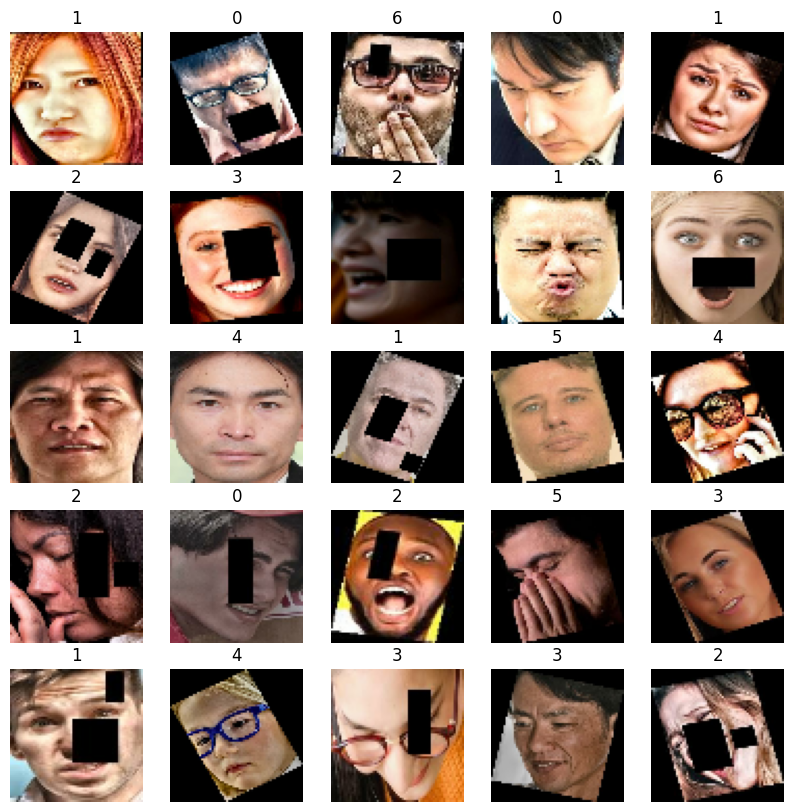

Data augmentation is turned off.
Class weight is turned off.
Epoch 1/30
656/656 [==============================] - ETA: 0s - loss: 0.3377 - accuracy: 0.9686
Epoch 1: val_loss improved from inf to 0.55152, saving model to /content/gdrive/MyDrive/Emotion_Recognition/output/emotion2_final_model_best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


656/656 [==============================] - 433s 591ms/step - loss: 0.3377 - accuracy: 0.9686 - val_loss: 0.5515 - val_accuracy: 0.9087
Epoch 2/30
656/656 [==============================] - ETA: 0s - loss: 0.3242 - accuracy: 0.9739
Epoch 2: val_loss improved from 0.55152 to 0.54918, saving model to /content/gdrive/MyDrive/Emotion_Recognition/output/emotion2_final_model_best.h5
656/656 [==============================] - 346s 526ms/step - loss: 0.3242 - accuracy: 0.9739 - val_loss: 0.5492 - val_accuracy: 0.9137
Epoch 3/30
656/656 [==============================] - ETA: 0s - loss: 0.3177 - accuracy: 0.9765
Epoch 3: val_loss improved from 0.54918 to 0.54742, saving model to /content/gdrive/MyDrive/Emotion_Recognition/output/emotion2_final_model_best.h5
656/656 [==============================] - 346s 527ms/step - loss: 0.3177 - accuracy: 0.9765 - val_loss: 0.5474 - val_accuracy: 0.9144
Epoch 4/30
656/656 [==============================] - ETA: 0s - loss: 0.3119 - accuracy: 0.9780
Epoch 4: va

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.models import load_model
# Define the model path
model_path = "/content/emotion_final_model_best.h5"

batch_size = 128
condition_to_apply_weights = False  # Set this based on your specific needs
use_augmentation = False

# Progressive resizing schedule (example: double size after 30 epochs)
sizes = [(64,64)]  # Define your sizes here
epochs_per_size = [30]  # Define how many epochs to train for each size
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Emotion_Recognition/output/emotion2_final_model_best.h5",
                               verbose=1,
                               save_best_only=True)

for i, (new_height, new_width) in enumerate(sizes):
    # Update dataset with new image size
    train_dataset, val_dataset, test_dataset = load_dataset(new_height, new_width, batch_size, use_augmentation, oversample_minority=False)

    class_weight_dict = apply_class_weight_conditionally(train_dataset, condition_to_apply_weights, batch_size=64*8)

    # Print class weights if they're applied
    if class_weight_dict:
        print("Class weights are:", class_weight_dict)
    else:
        print("Class weight is turned off.")


    # Rebuild and recompile the model with new input shape
    model = build_model(new_height, new_width, use_augmentation)
    model = load_model(model_path)

    # Continue training
    model.fit(train_dataset, validation_data=val_dataset, epochs=epochs_per_size[i],
              class_weight=class_weight_dict,
              shuffle=True,
              callbacks=[early_stopping, checkpointer])  # Include ModelCheckpoint in callbacks
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f'Test accuracy {i}: {test_accuracy}, Test loss: {test_loss}')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

4/4 [==============================] - 5s 1s/step


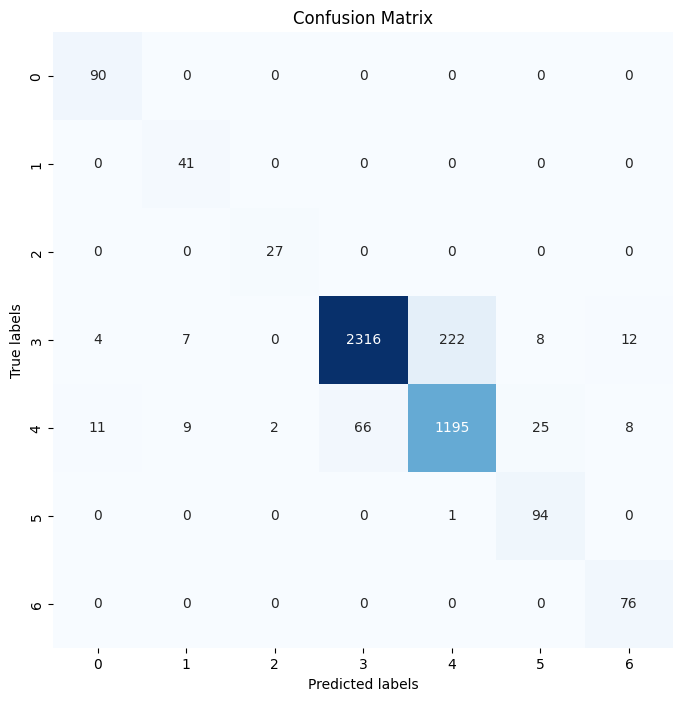

Classification Report:
              precision    recall  f1-score   support

           0    0.85714   1.00000   0.92308        90
           1    0.71930   1.00000   0.83673        41
           2    0.93103   1.00000   0.96429        27
           3    0.97229   0.90152   0.93557      2569
           4    0.84274   0.90805   0.87418      1316
           5    0.74016   0.98947   0.84685        95
           6    0.79167   1.00000   0.88372        76

    accuracy                        0.91101      4214
   macro avg    0.83633   0.97129   0.89492      4214
weighted avg    0.91816   0.91101   0.91242      4214

Weighted Precision: 0.91816
Weighted Recall: 0.91101
Weighted F1-score: 0.91242
Accuracy: 0.91101


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support


# After model evaluation, get predictions on the test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(model.predict(images), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=5))

# Calculate precision, recall, f1-score, and accuracy
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
accuracy = np.sum(y_true == y_pred) / len(y_true)

print("Weighted Precision: {:.5f}".format(precision))
print("Weighted Recall: {:.5f}".format(recall))
print("Weighted F1-score: {:.5f}".format(fscore))
print("Accuracy: {:.5f}".format(accuracy))
